<a href="https://colab.research.google.com/github/shashank297/Student-Performance-Analysis/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the dataset from this [link](https://docs.google.com/spreadsheets/d/1PCB8PJ7VZKdl55e1UYSaNTKesmiywbDVVsitG5XQjxo/edit?usp=sharing). You can find the dataset description there itself. Read it carefully and answer the questions below

**Make sure you write necessary Python code and use necessary visuals to support your answer**


##Metadata 

|Column Name |	Description |
| ---------- | ------------ |
| Gender |	The gender of the student
| Race/Ethnicity |	The racial or ethnic group to which the student belongs
| Parental Level of Education |	The highest level of education attained by either parent
|Lunch |	Whether the student received a standard or free/reduced lunch
|Test Preparation Course |	Whether the student completed a test preparation course
|Math Score|	The score the student received on the math portion of the exam
|Reading Score|	The score the student received on the reading portion of the exam
|Writing Score|	The score the student received on the writing portion of the exam


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/drive/My Drive/Data set masai/Student Performance Data.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


#### Find out the dataset dimensions

In [ ]:
df.shape

(1000, 8)

#### Find out statistical summary of the Dataset

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


#### Check for the null values in Dataset

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Check for the noise value of the dataset

In [ ]:
for i in df.columns:
  print(df[i].unique())

['female' 'male']
['group D' 'group B' 'group C' 'group E' 'group A']
['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
['standard' 'free/reduced']
['completed' 'none']
[ 59  96  57  70  83  68  82  46  80  74  53  76  55  56  35  87  65  66
  67  89  99  58  90  69  32  86  52  63  62  79  71  61  75  73  64  23
  41  84  85  88  91  51 100  48  98  72  43  50  38  81  47  49  44  60
  93  77  20  78  94  39  42  54  37  45  27  92  95  34  97  31  40  33
  21  25  28  15  24  30  36]
[ 70  93  76  85  57  83  61  75  69  50  74  73  54  46  47  92  82  71
  66  88  52  79  87  81  78  35  53  56  77  72  67  64  86  68  34  91
  62  33  58  49  80  89  97  65  51  96  84  90  95  55  60  99  45  63
  98  40  94  59  48  25  39  43  44  27 100  42  30  32  38  41  37]
[ 78  87  77  63  86  54  80  58  73  69  49  76  70  52  43  41  81  85
  74  62  71  88  72  51  59  79  75  37  82  48  67  65  90  68  56  84
  61  93  66  

#### Handle the null values in the Dataset

- As check there is no null values in the data set

#### Handle the Noise Values in Dataset

In [ ]:
df['parental level of education']=df['parental level of education'].str.replace('some high school','high school')

- As check there is no Noise values in the data set

#### Check the outliers for various Thresholds (1.5 x IQR , 2 X IQR and so on) for Numeric Columns

- As checked there is outliere but these columns are for marks/score So, there is a posiblity for 0-100 marks desided not to remove outliers 

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

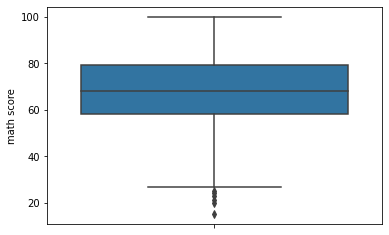

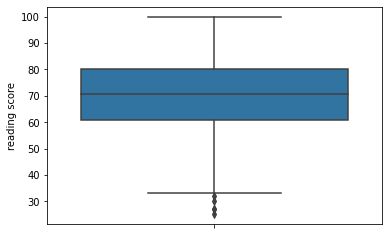

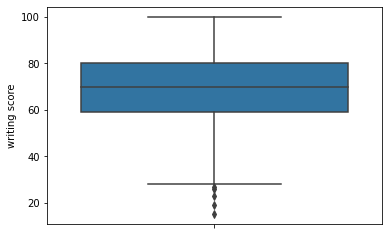

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
col=['math score', 'reading score',
       'writing score']

for j in col:
  plt.figure()
  sns.boxplot(y=j,data=df)

#### Find out distribution for each column(Use countplot for each feature)

##distribution for each column

- `Gender`:- Male Has the higher count then female
- `race/ethnicity`:- In this column Group C has the highest count.  `Group C > Group D > Group B > Group E > Group A`
- `parental level of education`:- high school has the highest count. `high school > some college > associate's degree > bachelor's degree > master's degree`
- `Lunch`:- `standard	` has the higher count in the column



<Figure size 1080x576 with 0 Axes>

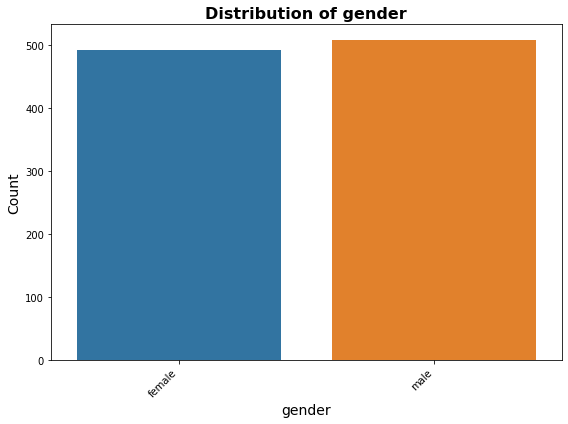

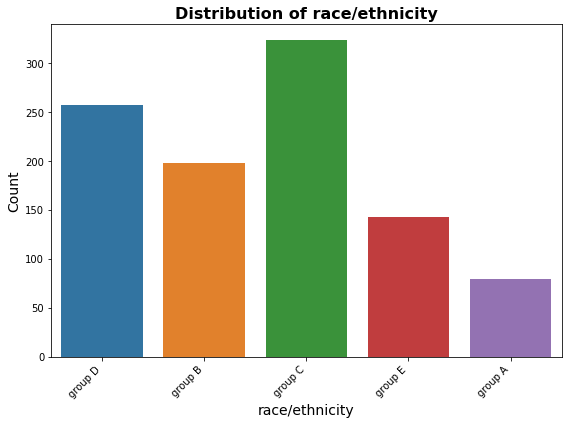

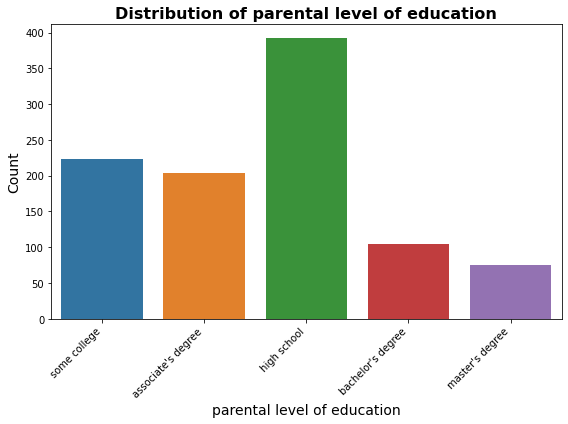

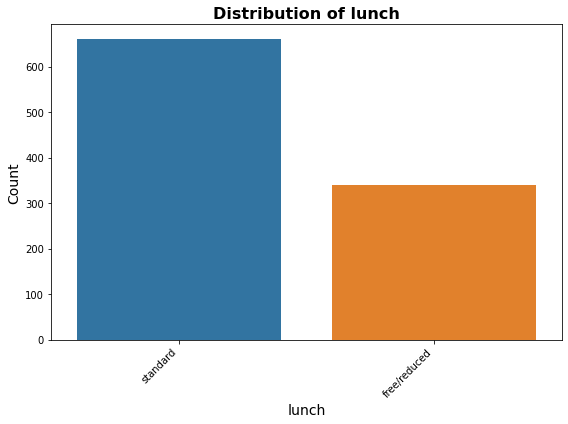

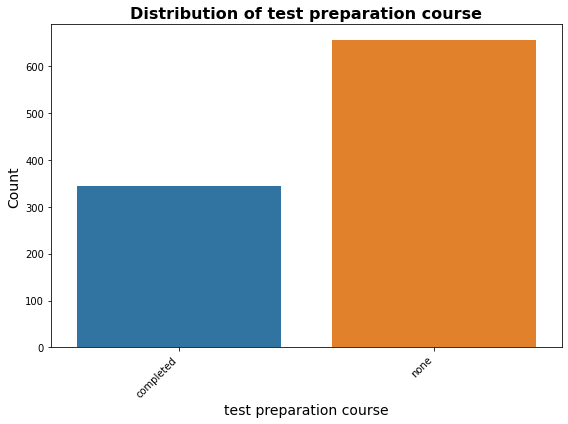

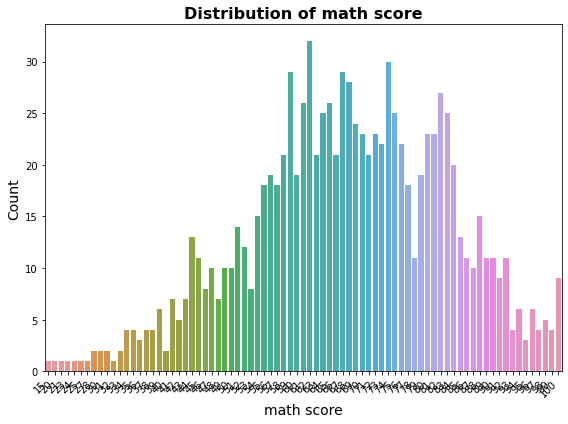

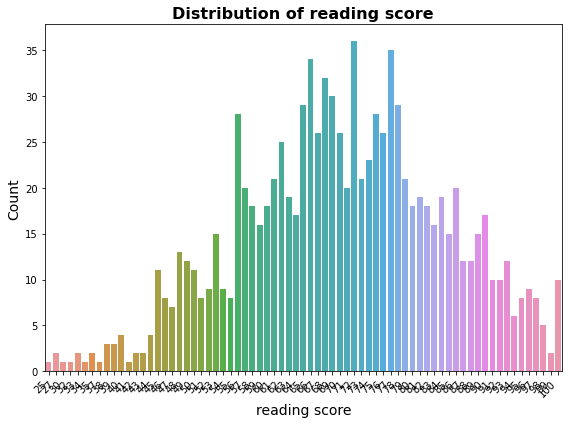

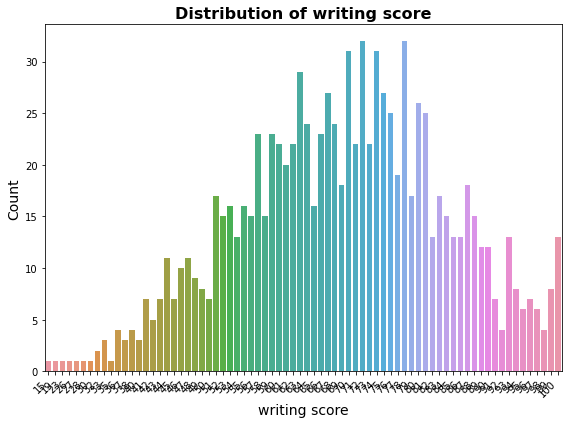

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
for column in df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x=column, data=df,)
    plt.title(f"Distribution of {column}", fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### Plot a pairplot for the dataset and summerize the results of the pairplot. 

- In this pairplot fig we can see that all the score columns are colelated with each other because every columns have up trend in the 

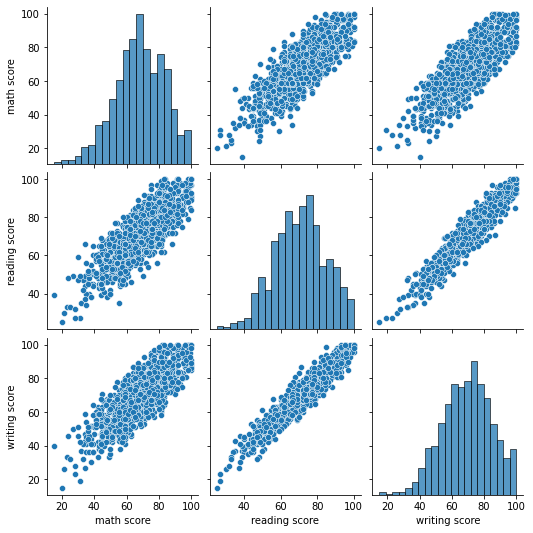

In [ ]:
sns.pairplot(df)

#### Give 60% weight to Maths and 20% for the remaining score. Calculate the weighted scores in one column

In [ ]:
df['Weighted Score']=(df['math score']*0.6) + (df[['reading score','writing score']].mean(axis=1)*0.2)

#### What is the relation between parental level of education and weighted score. Is there any trend ?

- As checked there is a positive relation between parental education and weighted score.
- Those parants has the higher education there childrans has slightly higher mean marks as compared to others.

In [ ]:
df.groupby('parental level of education')[['Weighted Score']].mean()

,Weighted Score
parental level of education,
associate's degree,56.677451
bachelor's degree,56.328571
high school,52.338010
master's degree,56.988000
some college,55.227232


<Axes: xlabel='parental level of education', ylabel='Weighted Score'>

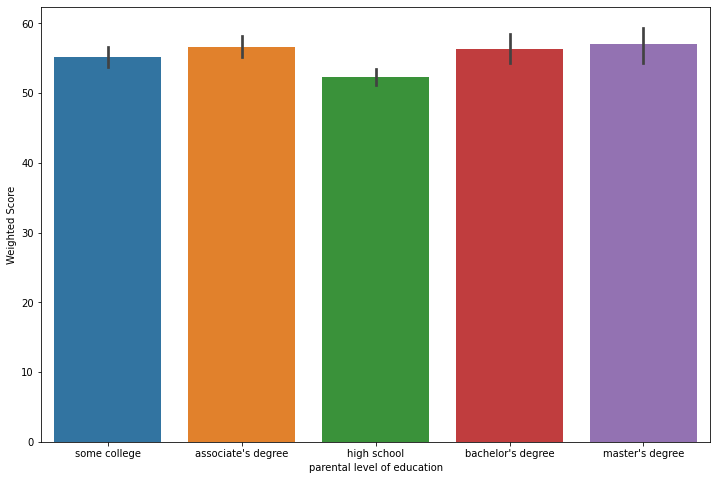

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='parental level of education',y='Weighted Score',data=df)

#### Is there a relationship between race/ethnecity and weighted score ?

- The relationship shown here is the average weighted score for each race/ethnicity group. Based on the data, group E has the highest average weighted score of 61.62, followed by group D with an average of 55.53. Group C has an average of 52.85, while group B and A have lower averages of 51.97 and 53.12 respectively.

---



In [ ]:
df.groupby('race/ethnicity')[['Weighted Score']].mean()

,Weighted Score
race/ethnicity,
group A,53.122785
group B,51.967172
group C,52.847988
group D,55.526459
group E,61.620979


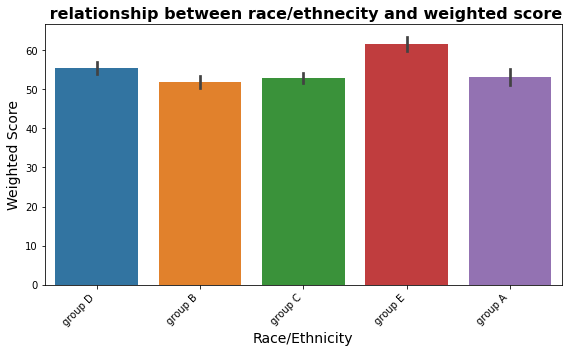

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='race/ethnicity',y='Weighted Score',data=df)
plt.title(' relationship between race/ethnecity and weighted score',fontsize=16, fontweight='bold')
plt.xlabel('Race/Ethnicity', fontsize=14)
plt.ylabel('Weighted Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### Find out the most common Parental Education for each race/ethnicity

- In this we can clearly see that:-

  - In Group A the most common parental education is `associate's degree`
  - In Group B the most common parental education is `high school`
  - In Group C the most common parental education is `some college`
  - In Group D the most common parental education is `associate's degree`
  - In Group A the most common parental education is `some college`

In [ ]:
df.groupby('race/ethnicity')[['parental level of education']].agg(pd.Series.mode)

,parental level of education
race/ethnicity,
group A,high school
group B,high school
group C,high school
group D,high school
group E,high school


#### Find out genderwise average of weighted score. Find out the tendency in Test preparation for each gender.

- In this we can see that Male has the higher Weighted Score `55.68`

In [ ]:
df.groupby('gender')[['Weighted Score']].mean()

,Weighted Score
gender,
female,53.555894
male,55.686417


- In this we can clearly clearly see that male has the higher tendency to compleate the test preparation course

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

<Figure size 576x576 with 0 Axes>

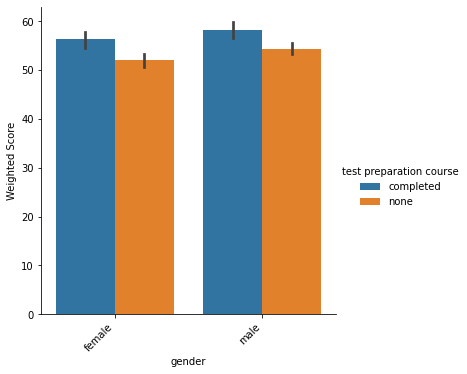

In [ ]:
plt.figure(figsize=(8,8))
sns.catplot(x='gender', y='Weighted Score', hue='test preparation course', kind='bar', data=df)
plt.xticks(rotation=45, ha='right')

#### Find out the effect of test preparation on average score

- In This section we can see that those who completed the test preparation course has the mean of Weighted Score

In [ ]:
df.groupby('test preparation course')[['Weighted Score']].mean()

,Weighted Score
test preparation course,
completed,57.254070
none,53.266463


# Explain the insights you gathered from the analysis done above in this Markdown Section

##Here's a summary of the given information:

- The pairplot figure shows a positive correlation between all the score columns, indicating that the scores are correlated with each other.

- There is a positive relationship between parental education and weighted score.

- Parents with higher education tend to have children with slightly higher mean marks than others.

- The average weighted score for each race/ethnicity group is highest for Group E (61.62) and lowest for Group B (51.97).

- The most common parental education varies among the different groups.

- Males have a higher weighted score (55.68) than females.

- Males also have a higher tendency to complete the test preparation course.

- Those who completed the test preparation course have a higher mean weighted score.